**Project 2 : Predicition of H1N1 Vaccination using survey by Anuj Atri**

**Dataset Description**

File descriptions

train.csv - the training set

train_labels.csv - the labels (vacc_h1n1_f, vacc_seas_f) for the training set

test.csv - the test set

submission.csv - a sample submission file in the correct format

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [ ]:
# Numerical Analysis
df.head(20)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0


In [ ]:
df.shape

(26707, 34)

In [ ]:
df.tail()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [ ]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
#check for duplicates
duplicate=df.duplicated()
print(duplicate.sum())

0


In [ ]:
# Check duplicates
df.T.duplicated()

unique_id                    False
h1n1_worry                   False
h1n1_awareness               False
antiviral_medication         False
contact_avoidance            False
bought_face_mask             False
wash_hands_frequently        False
avoid_large_gatherings       False
reduced_outside_home_cont    False
avoid_touch_face             False
dr_recc_h1n1_vacc            False
dr_recc_seasonal_vacc        False
chronic_medic_condition      False
cont_child_undr_6_mnths      False
is_health_worker             False
has_health_insur             False
is_h1n1_vacc_effective       False
is_h1n1_risky                False
sick_from_h1n1_vacc          False
is_seas_vacc_effective       False
is_seas_risky                False
sick_from_seas_vacc          False
age_bracket                  False
qualification                False
race                         False
sex                          False
income_level                 False
marital_status               False
housing_status      

In [ ]:
# Statistical Analysis
df.describe(include="all")

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [ ]:
# Dealing with all the missing values by replacing it.
median1=df["h1n1_worry"].median()
median1

2.0

In [ ]:
df["h1n1_worry"].replace(np.nan,median1,inplace=True)

In [ ]:
median2=df["h1n1_awareness"].median()
median2

1.0

In [ ]:
df["h1n1_awareness"].replace(np.nan,median2,inplace=True)

In [ ]:
median3=df["antiviral_medication"].median()
median3

0.0

In [ ]:
df["antiviral_medication"].replace(np.nan,median3,inplace=True)

In [ ]:
median4=df["contact_avoidance"].median()
median4

1.0

In [ ]:
df["contact_avoidance"].replace(np.nan,median4,inplace=True)

In [ ]:
median5=df["bought_face_mask"].median()
median5

0.0

In [ ]:
df["bought_face_mask"].replace(np.nan,median5,inplace=True)

In [ ]:
median6=df["wash_hands_frequently"].median()
median6

1.0

In [ ]:
df["wash_hands_frequently"].replace(np.nan,median6,inplace=True)

In [ ]:
median7=df["avoid_large_gatherings"].median()
median7

0.0

In [ ]:
df["avoid_large_gatherings"].replace(np.nan,median7,inplace=True)

In [ ]:
median8=df["reduced_outside_home_cont"].median()
median8

0.0

In [ ]:
df["reduced_outside_home_cont"].replace(np.nan,median8,inplace=True)

In [ ]:
median9=df["avoid_touch_face"].median()
median9

1.0

In [ ]:
df["avoid_touch_face"].replace(np.nan,median9,inplace=True)

In [ ]:
median10=df["dr_recc_h1n1_vacc"].median()
median10

0.0

In [ ]:
df["dr_recc_h1n1_vacc"].replace(np.nan,median10,inplace=True)

In [ ]:
median11=df["dr_recc_seasonal_vacc"].median()
median11

0.0

In [ ]:
df["dr_recc_seasonal_vacc"].replace(np.nan,median11,inplace=True)

In [ ]:
median12=df["chronic_medic_condition"].median()
median12

0.0

In [ ]:
df["chronic_medic_condition"].replace(np.nan,median12,inplace=True)

In [ ]:
median13=df["cont_child_undr_6_mnths"].median()
median13

0.0

In [ ]:
df["cont_child_undr_6_mnths"].replace(np.nan,median13,inplace=True)

In [ ]:
median14=df["is_health_worker"].median()
median14

0.0

In [ ]:
df["is_health_worker"].replace(np.nan,median14,inplace=True)

In [ ]:
median15=df["has_health_insur"].median()
median15

1.0

In [ ]:
df["has_health_insur"].replace(np.nan,median15,inplace=True)

In [ ]:
median16=df["is_h1n1_vacc_effective"].median()
median16

4.0

In [ ]:
df["is_h1n1_vacc_effective"].replace(np.nan,median16,inplace=True)

In [ ]:
median17=df["is_h1n1_risky"].median()
median17

2.0

In [ ]:
df["is_h1n1_risky"].replace(np.nan,median17,inplace=True)

In [ ]:
median18=df["sick_from_h1n1_vacc"].median()
median18

2.0

In [ ]:
df["sick_from_h1n1_vacc"].replace(np.nan,median18,inplace=True)

In [ ]:
median19=df["is_seas_vacc_effective"].median()
median19

4.0

In [ ]:
df["is_seas_vacc_effective"].replace(np.nan,median19,inplace=True)

In [ ]:
median20=df["is_seas_risky"].median()
median20

2.0

In [ ]:
df["is_seas_risky"].replace(np.nan,median20,inplace=True)

In [ ]:
median21=df["sick_from_seas_vacc"].median()
median21

2.0

In [ ]:
df["sick_from_seas_vacc"].replace(np.nan,median21,inplace=True)

In [ ]:
median22=df["no_of_adults"].median()
median22

1.0

In [ ]:
df["no_of_adults"].replace(np.nan,median22,inplace=True)

In [ ]:
median23=df["no_of_children"].median()
median23

0.0

In [ ]:
df["no_of_children"].replace(np.nan,median23,inplace=True)

In [ ]:
mode1=df["qualification"].mode().values[0]
mode1

'College Graduate'

In [ ]:
df["qualification"].replace(np.nan,mode1,inplace=True)

In [ ]:
mode2=df["income_level"].mode().values[0]
mode2

'<= $75,000, Above Poverty'

In [ ]:
df["income_level"].replace(np.nan,mode2,inplace=True)

In [ ]:
mode3=df["marital_status"].mode().values[0]
mode3

'Married'

In [ ]:
df["marital_status"].replace(np.nan,mode3,inplace=True)

In [ ]:
mode4=df["housing_status"].mode().values[0]
mode4

'Own'

In [ ]:
df["housing_status"].replace(np.nan,mode4,inplace=True)

In [ ]:
mode5=df["employment"].mode().values[0]
mode5

'Employed'

In [ ]:
df["employment"].replace(np.nan,mode5,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

<AxesSubplot:xlabel='qualification', ylabel='count'>

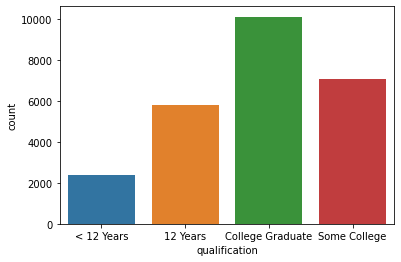

In [ ]:
# VISUALIZATION
sns.countplot(x="qualification", data=df)

<AxesSubplot:xlabel='race', ylabel='count'>

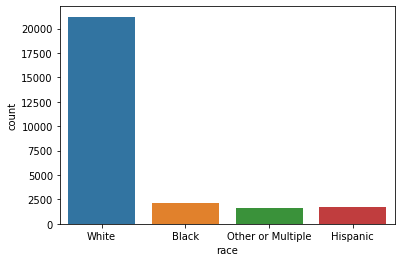

In [ ]:
sns.countplot(x="race", data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

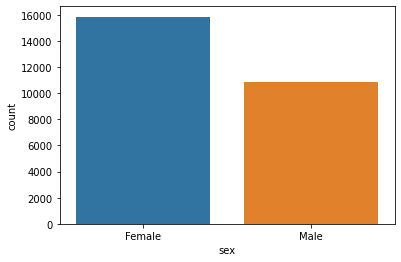

In [ ]:
sns.countplot(x="sex", data=df)

<AxesSubplot:xlabel='income_level', ylabel='count'>

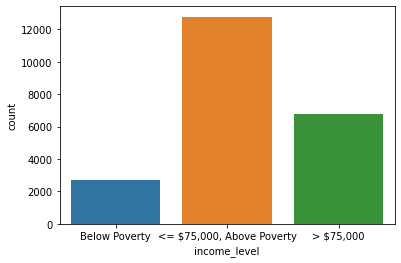

In [ ]:
sns.countplot(x="income_level", data=df)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

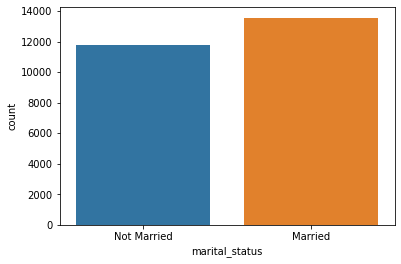

In [ ]:
sns.countplot(x="marital_status", data=df)

<AxesSubplot:xlabel='housing_status', ylabel='count'>

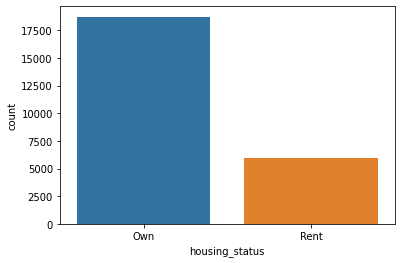

In [ ]:
sns.countplot(x="housing_status", data=df)

<AxesSubplot:xlabel='employment', ylabel='count'>

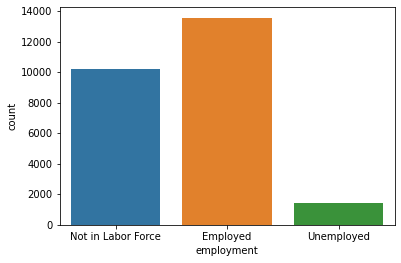

In [ ]:
sns.countplot(x="employment", data=df)

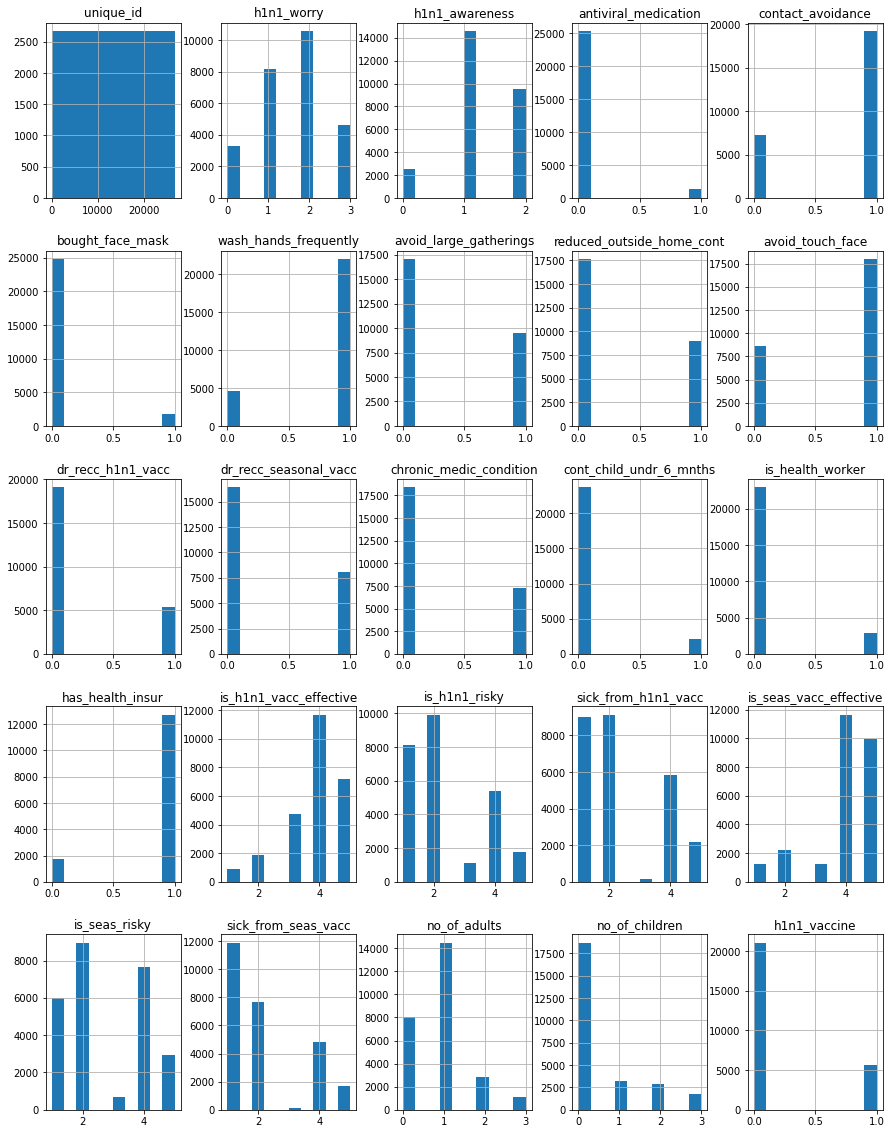

In [ ]:
df.hist(figsize=(15,20))
plt.show()

<AxesSubplot:>

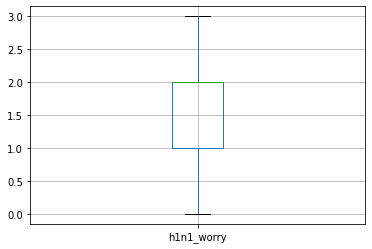

In [ ]:
df.boxplot(column=["h1n1_worry"])

<AxesSubplot:>

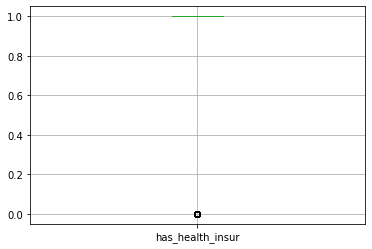

In [ ]:
df.boxplot(column=["has_health_insur"])

<AxesSubplot:>

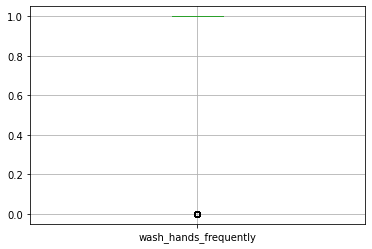

In [ ]:
df.boxplot(column=["wash_hands_frequently"])

<AxesSubplot:>

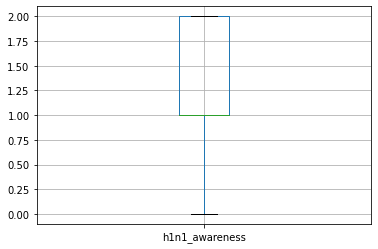

In [ ]:
df.boxplot(column=["h1n1_awareness"])

<AxesSubplot:>

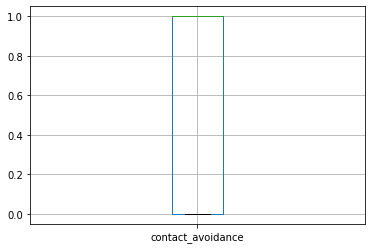

In [ ]:
df.boxplot(column=["contact_avoidance"])

<AxesSubplot:>

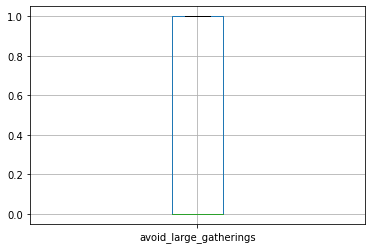

In [ ]:
df.boxplot(column=["avoid_large_gatherings"])

<AxesSubplot:>

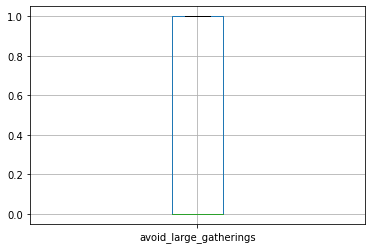

In [ ]:
df.boxplot(column=["avoid_large_gatherings"])

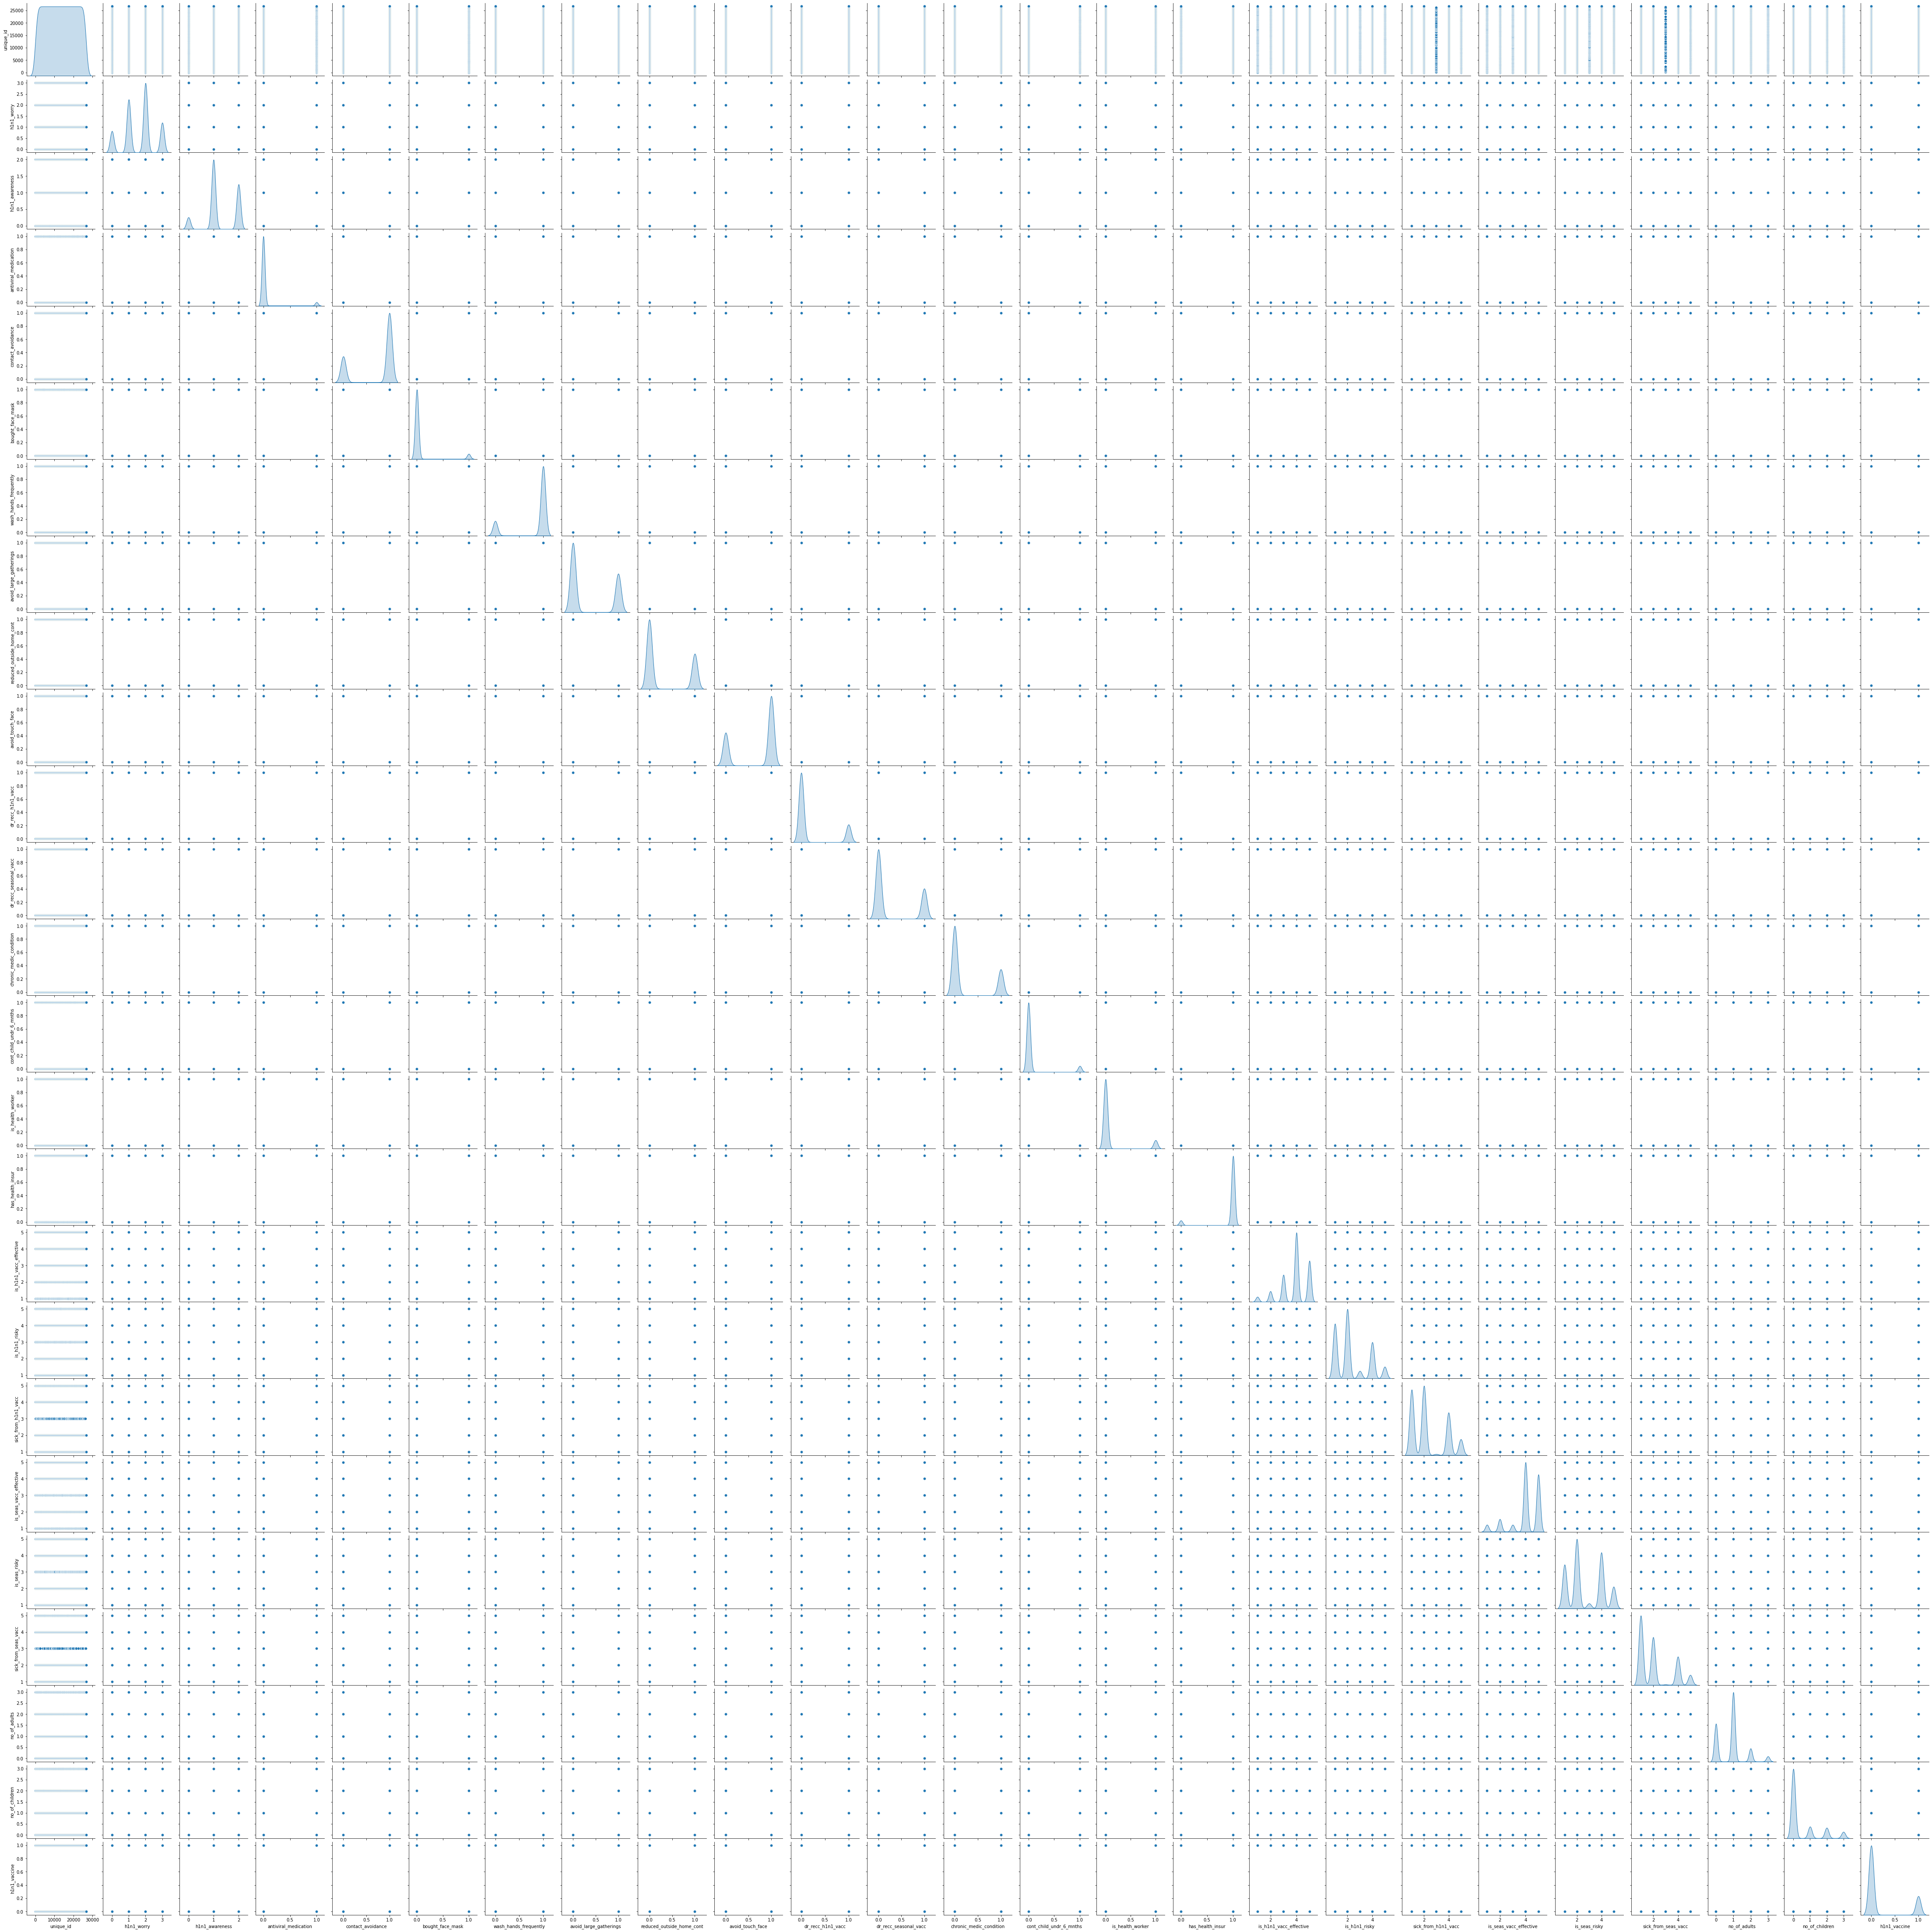

In [ ]:
sb.pairplot(df,diag_kind="kde")

<AxesSubplot:>

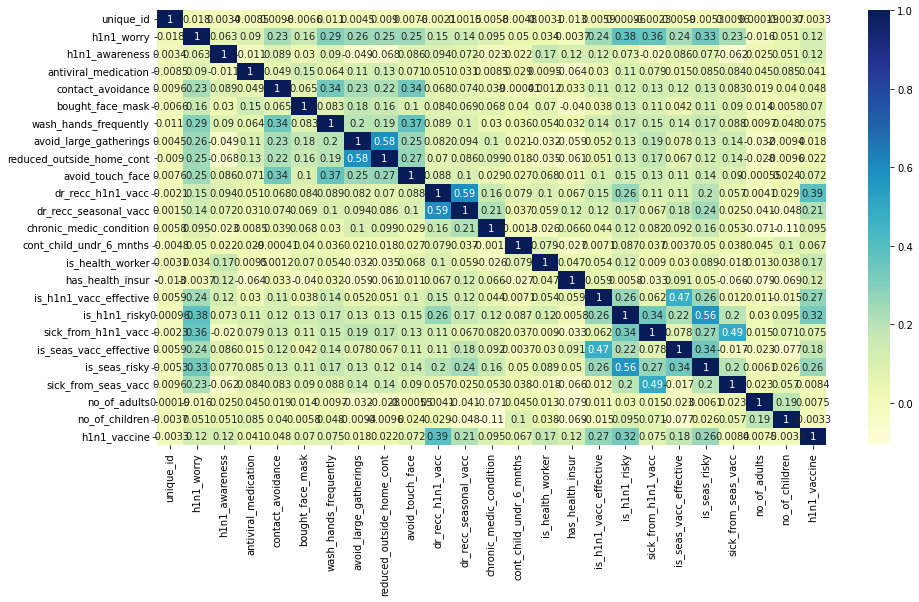

In [ ]:
# Multivariate Analysis
plt.figure(figsize = (15, 8))
corr = df.corr()
sns.heatmap(corr, annot=True,cmap="YlGnBu")

In [ ]:
#lets build our linear model
#independent variables
X=df.drop(['h1n1_vaccine'],axis=1)
#the dependent variable
y=df[['h1n1_vaccine']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
 # Split X and y into training and test set in 70:30 ratio
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30)

In [ ]:
model_1=LogisticRegression()
model_1.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   unique_id                               26707 non-null  int64  
 1   h1n1_worry                              26707 non-null  float64
 2   h1n1_awareness                          26707 non-null  float64
 3   antiviral_medication                    26707 non-null  float64
 4   contact_avoidance                       26707 non-null  float64
 5   bought_face_mask                        26707 non-null  float64
 6   wash_hands_frequently                   26707 non-null  float64
 7   avoid_large_gatherings                  26707 non-null  float64
 8   reduced_outside_home_cont               26707 non-null  float64
 9   avoid_touch_face                        26707 non-null  float64
 10  dr_recc_h1n1_vacc                       26707 non-null  fl

In [ ]:
dummies=pd.get_dummies(df[['age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa']])

In [ ]:
df=pd.concat([df,dummies],axis=1)

In [ ]:
df.drop("age_bracket",axis=1,inplace=True)

In [ ]:
df.drop("qualification",axis=1,inplace=True)

In [ ]:
df.drop("race",axis=1,inplace=True)

In [ ]:
df.drop("sex",axis=1,inplace=True)

In [ ]:
df.drop("income_level",axis=1,inplace=True)

In [ ]:
df.drop("marital_status",axis=1,inplace=True)

In [ ]:
df.drop("housing_status",axis=1,inplace=True)

In [ ]:
df.drop("employment",axis=1,inplace=True)

In [ ]:
df.drop("census_msa",axis=1,inplace=True)

In [ ]:
model_1.score(X_train,Y_train)

0.8271103027709426

In [ ]:
model_1.score(X_test,Y_test)

0.8214152002995133

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_2=KNeighborsClassifier()
model_2.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
model_2.score(X_train,Y_train)

0.8163581897935166

In [ ]:
model_2.score(X_test,Y_test)

0.7563958567328092

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_3=SVC()

In [ ]:
model_3.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
model_3.score(X_train,Y_train)

0.7881673264148925

In [ ]:
model_3.score(X_test,Y_test)

0.7860975914139523

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_4=DecisionTreeClassifier(max_depth=4)

In [ ]:
model_4.fit(X_train,Y_train)

In [ ]:
model_4.score(X_train,Y_train)

0.8348668021825184

In [ ]:
model_4.score(X_test,Y_test)

0.8262822912766754

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
model_5=BaggingClassifier()

In [ ]:
model_5.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier()

In [ ]:
model_5.score(X_train,Y_train)

0.9829891943939232

In [ ]:
model_5.score(X_test,Y_test)

0.8109322351179333

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Creating adaboost classifier model
model_6 = AdaBoostClassifier()

In [ ]:
model_6.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [ ]:
model_6.score(X_train,Y_train)

0.8379694019471489

In [ ]:
model_6.score(X_test,Y_test)

0.8287782353675278

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_7=GradientBoostingClassifier()

In [ ]:
model_7.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [ ]:
model_7.score(X_train,Y_train)

0.847009735744089

In [ ]:
model_7.score(X_test,Y_test)

0.8317733682765506

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_8=RandomForestClassifier()

In [ ]:
model_8.fit(X_train,Y_train)

<ipython-input-166-d007ac9728f8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_8.fit(X_train,Y_train)


RandomForestClassifier()

In [ ]:
model_8.score(X_train,Y_train)

0.9999465069006098

In [ ]:
model_8.score(X_test,Y_test)

0.824784724822164

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
model_9 = SGDClassifier()
model_9.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

In [ ]:
model_9.score(X_train,Y_train)

0.7789130202203915

In [ ]:
model_9.score(X_test,Y_test)

0.7779857731186821

In [ ]:
# Result
# The score for the model of Random Forest Classifier is best amoung all them.